In [1]:
!pip install seaborn==0.9.0

In [2]:
import seaborn as sns

print(sns.__version__)

0.9.0


In [3]:
!pip install graphviz==0.9
!pip install pydot

  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [4]:
!apt-get install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.


In [5]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/e99a526b2e7ccc6c3b70f53db43a87d2/raw/1605fc74aa778066bf2e6695e24d53cf65f2f447/machine-learning-carros-simulacao.csv"
dados = pd.read_csv(uri).drop(columns=["Unnamed: 0"], axis=1)
dados.head()

preco  vendido  idade_do_modelo   km_por_ano
0   30941.02        1               18  35085.22134
1   40557.96        1               20  12622.05362
2   89627.50        0               12  11440.79806
3   95276.14        0                3  43167.32682
4  117384.68        1                4  12770.11290

In [6]:
# situação horrível de "azar" onde as classes estão ordenadas por padrão

dados_azar = dados.sort_values("vendido", ascending=True)
x_azar = dados_azar[["preco", "idade_do_modelo","km_por_ano"]]
y_azar = dados_azar["vendido"]
dados_azar.head()

preco  vendido  idade_do_modelo   km_por_ano
4999  74023.29        0               12  24812.80412
5322  84843.49        0               13  23095.63834
5319  83100.27        0               19  36240.72746
5316  87932.13        0               16  32249.56426
5315  77937.01        0               15  28414.50704

In [7]:
from sklearn.model_selection import cross_validate
from sklearn.dummy import DummyClassifier
import numpy as np

SEED = 301
np.random.seed(SEED)

modelo = DummyClassifier()
results = cross_validate(modelo, x_azar, y_azar, cv = 10, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print("Accuracy com dummy stratified, 10 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

Accuracy com dummy stratified, 10 = [49.79, 53.45]


In [8]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier

SEED = 301
np.random.seed(SEED)

modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv = 10, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print("Accuracy com cross validation, 10 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

Accuracy com cross validation, 10 = [73.83, 77.73]


In [9]:
# gerando dados elatorios de modelo de carro para simulacao de agrupamento ao usar nosso estimador

np.random.seed(SEED)
dados['modelo'] = dados.idade_do_modelo + np.random.randint(-2, 3, size=10000)
dados.modelo = dados.modelo + abs(dados.modelo.min()) + 1
dados.head()

preco  vendido  idade_do_modelo   km_por_ano  modelo
0   30941.02        1               18  35085.22134      18
1   40557.96        1               20  12622.05362      24
2   89627.50        0               12  11440.79806      14
3   95276.14        0                3  43167.32682       6
4  117384.68        1                4  12770.11290       5

In [0]:
def imprime_resultados(results):
  media = results['test_score'].mean() * 100
  desvio = results['test_score'].std() * 100
  print("Accuracy médio %.2f" % media)
  print("Intervalo [%.2f, %.2f]" % (media - 2 * desvio, media + 2 * desvio))

In [11]:
# GroupKFold em um pipeline com StandardScaler e SVC

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

scaler = StandardScaler()
modelo = SVC()

pipeline = Pipeline([('transformacao',scaler), ('estimador',modelo)])

cv = GroupKFold(n_splits = 10)
results = cross_validate(pipeline, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to floa

Accuracy médio 76.68
Intervalo [74.28, 79.08]


/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [12]:
# GroupKFold para analisar como o modelo se comporta com novos grupos

from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio 75.78
Intervalo [73.67, 77.90]


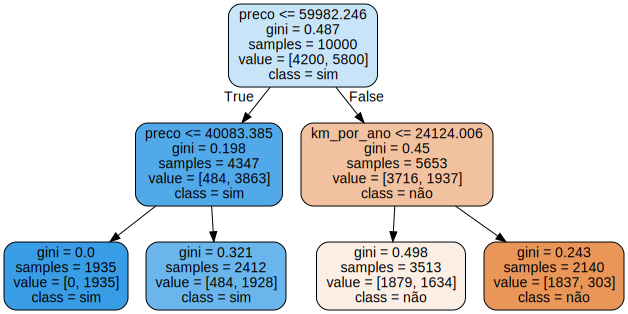

In [13]:
from sklearn.tree import export_graphviz
import graphviz

modelo.fit(x_azar, y_azar)
features = x_azar.columns
dot_data = export_graphviz(modelo, out_file=None, filled=True, rounded=True,
                          class_names=["não","sim"],
                          feature_names = features)
graph = graphviz.Source(dot_data)
graph

In [14]:
# GroupKFold para analisar como o modelo se comporta com novos grupos

from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=3)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio 78.67
Intervalo [76.40, 80.94]


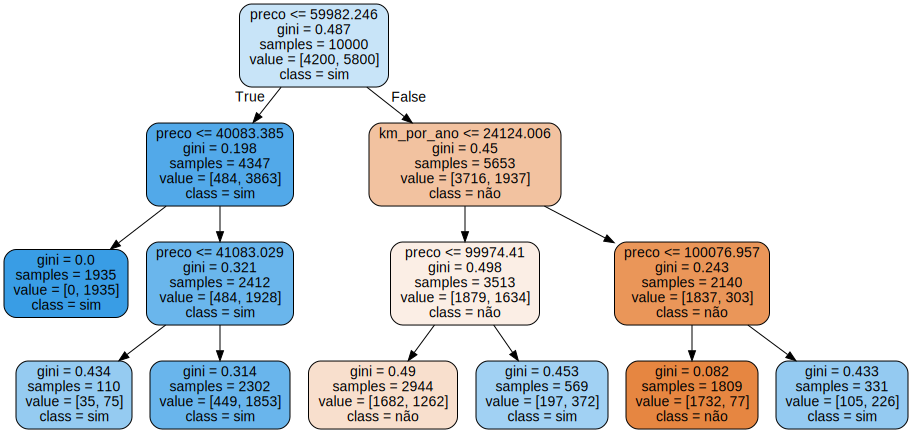

In [15]:
from sklearn.tree import export_graphviz
import graphviz

modelo.fit(x_azar, y_azar)
features = x_azar.columns
dot_data = export_graphviz(modelo, out_file=None, filled=True, rounded=True,
                          class_names=["não","sim"],
                          feature_names = features)
graph = graphviz.Source(dot_data)
graph

In [16]:
# GroupKFold para analisar como o modelo se comporta com novos grupos

from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=10)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio 77.19
Intervalo [75.26, 79.13]


# Explorando hiper parâmetros em uma dimensão

In [17]:
def roda_arvore_de_decisao(max_depth):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth)
  results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
  train_score = results['train_score'].mean() * 100
  test_score = results['test_score'].mean() * 100
  print("Arvore max_depth = %d, treino = %.2f, teste = %.2f" % (max_depth, train_score, test_score))
  tabela = [max_depth, train_score, test_score]
  return tabela
  
resultados = [roda_arvore_de_decisao(i) for i in range(1,33)]
resultados = pd.DataFrame(resultados, columns= ["max_depth","train","test"])
resultados.head()

Arvore max_depth = 1, treino = 75.79, teste = 75.78
Arvore max_depth = 2, treino = 75.79, teste = 75.78
Arvore max_depth = 3, treino = 78.75, teste = 78.67
Arvore max_depth = 4, treino = 78.79, teste = 78.63
Arvore max_depth = 5, treino = 78.94, teste = 78.56
Arvore max_depth = 6, treino = 79.17, teste = 78.12
Arvore max_depth = 7, treino = 79.50, teste = 77.96
Arvore max_depth = 8, treino = 79.89, teste = 77.86
Arvore max_depth = 9, treino = 80.46, teste = 77.38
Arvore max_depth = 10, treino = 81.16, teste = 77.19
Arvore max_depth = 11, treino = 82.03, teste = 76.97
Arvore max_depth = 12, treino = 82.89, teste = 76.49
Arvore max_depth = 13, treino = 83.95, teste = 75.81
Arvore max_depth = 14, treino = 85.03, teste = 75.66
Arvore max_depth = 15, treino = 86.14, teste = 75.16
Arvore max_depth = 16, treino = 87.19, teste = 75.11
Arvore max_depth = 17, treino = 88.31, teste = 74.74
Arvore max_depth = 18, treino = 89.26, teste = 74.33
Arvore max_depth = 19, treino = 90.32, teste = 74.34
Ar

max_depth      train       test
0          1  75.791169  75.784219
1          2  75.791169  75.784219
2          3  78.750993  78.672633
3          4  78.787628  78.632803
4          5  78.941007  78.555912

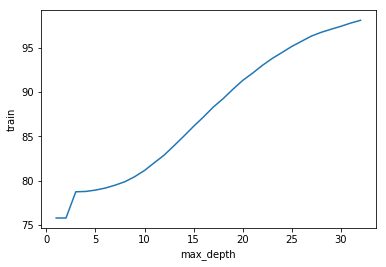

In [18]:
import seaborn as sns

sns.lineplot(x = "max_depth", y = "train", data = resultados)

# OVERFIT: ficou "perfeito" para o treino mas ruim para o teste

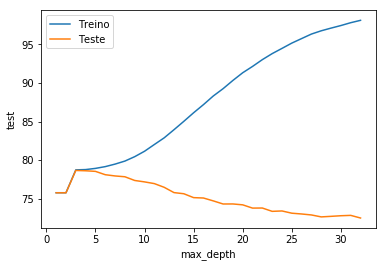

In [19]:
import matplotlib.pyplot as plt

sns.lineplot(x = "max_depth", y = "train", data = resultados)
sns.lineplot(x = "max_depth", y = "test", data = resultados)
plt.legend(["Treino", "Teste"])

In [20]:
resultados.sort_values("test", ascending=False).head()

max_depth      train       test
2          3  78.750993  78.672633
3          4  78.787628  78.632803
4          5  78.941007  78.555912
5          6  79.170115  78.123266
6          7  79.496806  77.963185

# Explorando hiper parâmetros em 2 dimensões

In [21]:
def roda_arvore_de_decisao(max_depth, min_samples_leaf):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf = min_samples_leaf)
  results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
  train_score = results['train_score'].mean() * 100
  test_score = results['test_score'].mean() * 100
  print("Arvore max_depth = %d, min_samples_leaf = %d, treino = %.2f, teste = %.2f" % (max_depth, min_samples_leaf, train_score, test_score))
  tabela = [max_depth, min_samples_leaf, train_score, test_score]
  return tabela

def busca():
  resultados = []
  for max_depth in range(1,33):
    for min_samples_leaf in [32, 64, 128, 256]:
      tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf)
      resultados.append(tabela)
  resultados = pd.DataFrame(resultados, columns= ["max_depth","min_samples_leaf","train","test"])
  return resultados

resultados = busca()
resultados.head()

Arvore max_depth = 1, min_samples_leaf = 32, treino = 75.79, teste = 75.78
Arvore max_depth = 1, min_samples_leaf = 64, treino = 75.79, teste = 75.78
Arvore max_depth = 1, min_samples_leaf = 128, treino = 75.79, teste = 75.78
Arvore max_depth = 1, min_samples_leaf = 256, treino = 75.79, teste = 75.78
Arvore max_depth = 2, min_samples_leaf = 32, treino = 75.79, teste = 75.78
Arvore max_depth = 2, min_samples_leaf = 64, treino = 75.79, teste = 75.78
Arvore max_depth = 2, min_samples_leaf = 128, treino = 75.79, teste = 75.78
Arvore max_depth = 2, min_samples_leaf = 256, treino = 75.79, teste = 75.78
Arvore max_depth = 3, min_samples_leaf = 32, treino = 78.75, teste = 78.67
Arvore max_depth = 3, min_samples_leaf = 64, treino = 78.75, teste = 78.67
Arvore max_depth = 3, min_samples_leaf = 128, treino = 78.75, teste = 78.67
Arvore max_depth = 3, min_samples_leaf = 256, treino = 78.75, teste = 78.67
Arvore max_depth = 4, min_samples_leaf = 32, treino = 78.75, teste = 78.67
Arvore max_depth = 

max_depth  min_samples_leaf      train       test
0          1                32  75.791169  75.784219
1          1                64  75.791169  75.784219
2          1               128  75.791169  75.784219
3          1               256  75.791169  75.784219
4          2                32  75.791169  75.784219

In [22]:
resultados.sort_values("test", ascending=False).head()

max_depth  min_samples_leaf      train       test
15          4               256  78.750993  78.672633
12          4                32  78.750993  78.672633
14          4               128  78.750993  78.672633
13          4                64  78.750993  78.672633
8           3                32  78.750993  78.672633

In [23]:
corr = resultados.corr()
corr

max_depth  min_samples_leaf     train      test
max_depth          1.000000          0.000000  0.536705 -0.027675
min_samples_leaf   0.000000          1.000000 -0.409676  0.349011
train              0.536705         -0.409676  1.000000  0.116466
test              -0.027675          0.349011  0.116466  1.000000

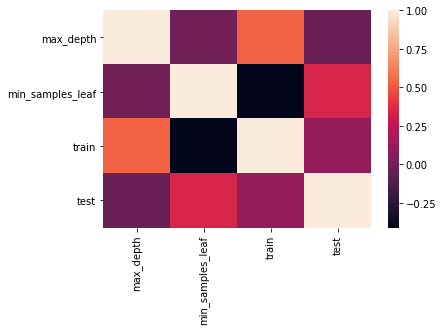

In [24]:
sns.heatmap(corr)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f89957f2208>,
      dtype=object)

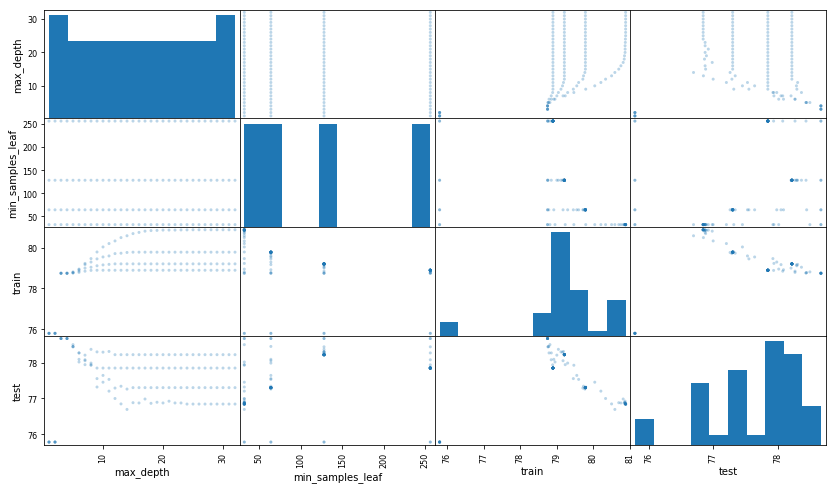

In [25]:
pd.scatter_matrix(resultados, figsize = (14, 8), alpha = 0.3)

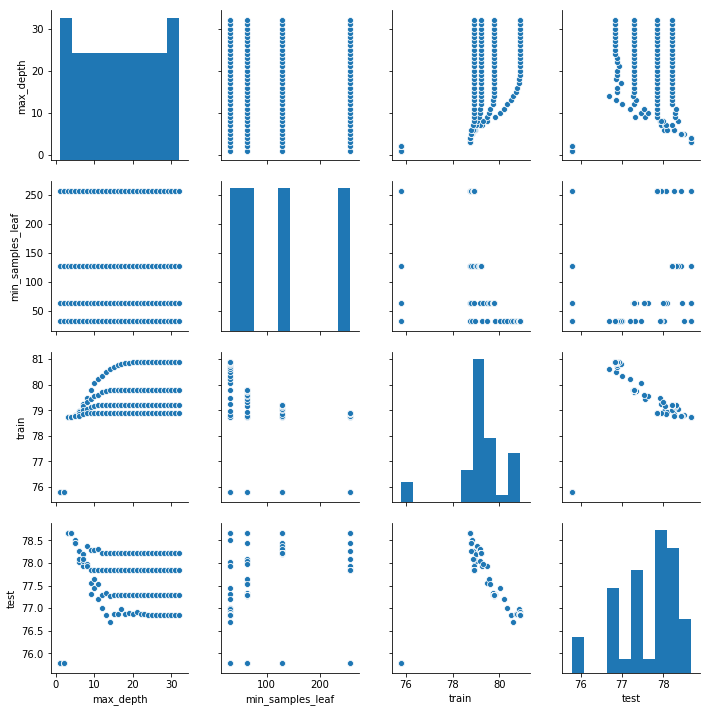

In [26]:
sns.pairplot(resultados)

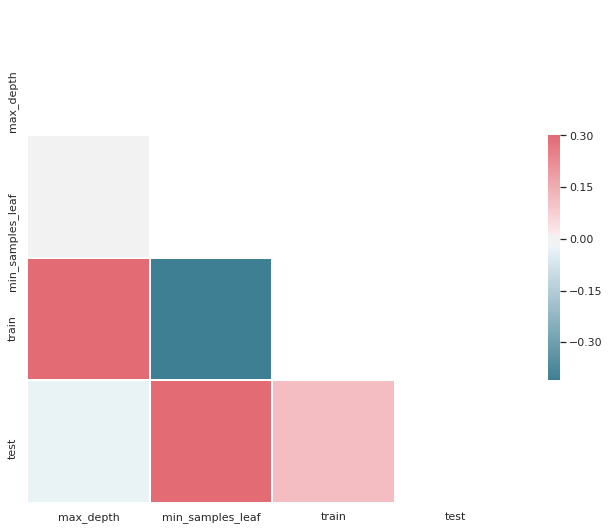

In [27]:
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [28]:
def busca():
  resultados = []
  for max_depth in range(1,33):
    for min_samples_leaf in [128, 192, 256, 512]:
      tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf)
      resultados.append(tabela)
  resultados = pd.DataFrame(resultados, columns= ["max_depth","min_samples_leaf","train","test"])
  return resultados

resultados = busca()
resultados.head()

Arvore max_depth = 1, min_samples_leaf = 128, treino = 75.79, teste = 75.78
Arvore max_depth = 1, min_samples_leaf = 192, treino = 75.79, teste = 75.78
Arvore max_depth = 1, min_samples_leaf = 256, treino = 75.79, teste = 75.78
Arvore max_depth = 1, min_samples_leaf = 512, treino = 75.79, teste = 75.78
Arvore max_depth = 2, min_samples_leaf = 128, treino = 75.79, teste = 75.78
Arvore max_depth = 2, min_samples_leaf = 192, treino = 75.79, teste = 75.78
Arvore max_depth = 2, min_samples_leaf = 256, treino = 75.79, teste = 75.78
Arvore max_depth = 2, min_samples_leaf = 512, treino = 75.79, teste = 75.78
Arvore max_depth = 3, min_samples_leaf = 128, treino = 78.75, teste = 78.67
Arvore max_depth = 3, min_samples_leaf = 192, treino = 78.75, teste = 78.67
Arvore max_depth = 3, min_samples_leaf = 256, treino = 78.75, teste = 78.67
Arvore max_depth = 3, min_samples_leaf = 512, treino = 77.53, teste = 77.50
Arvore max_depth = 4, min_samples_leaf = 128, treino = 78.75, teste = 78.67
Arvore max_d

max_depth  min_samples_leaf      train       test
0          1               128  75.791169  75.784219
1          1               192  75.791169  75.784219
2          1               256  75.791169  75.784219
3          1               512  75.791169  75.784219
4          2               128  75.791169  75.784219

In [0]:
corr = resultados.corr()

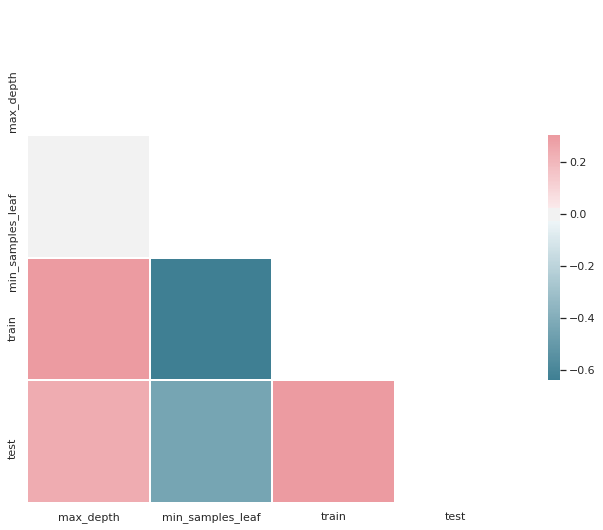

In [30]:
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [31]:
resultados.sort_values("test", ascending=False).head()

max_depth  min_samples_leaf      train       test
13          4               192  78.750993  78.672633
8           3               128  78.750993  78.672633
9           3               192  78.750993  78.672633
10          3               256  78.750993  78.672633
14          4               256  78.750993  78.672633

# Explorando 3 dimensões de hiper parâmetros

In [32]:
def roda_arvore_de_decisao(max_depth, min_samples_leaf, min_samples_split):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf = min_samples_leaf, min_samples_split = min_samples_split)
  results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
  fit_time = results['fit_time'].mean()
  score_time = results['score_time'].mean()
  train_score = results['train_score'].mean() * 100
  test_score = results['test_score'].mean() * 100
  tabela = [max_depth, min_samples_leaf, min_samples_split, train_score, test_score, fit_time, score_time]
  return tabela

def busca():
  resultados = []
  for max_depth in range(1,33):
    for min_samples_leaf in [32, 64, 128, 256]:
      for min_samples_split in [32, 64, 128, 256]:
        tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf, min_samples_split)
        resultados.append(tabela)
  resultados = pd.DataFrame(resultados, columns= ["max_depth","min_samples_leaf","min_samples_split","train","test", "fit_time", "score_time"])
  return resultados

resultados = busca()
resultados.head()








max_depth  min_samples_leaf  min_samples_split      train       test  \
0          1                32                 32  75.791169  75.784219   
1          1                32                 64  75.791169  75.784219   
2          1                32                128  75.791169  75.784219   
3          1                32                256  75.791169  75.784219   
4          1                64                 32  75.791169  75.784219   

   fit_time  score_time  
0  0.006125    0.001328  
1  0.005767    0.001207  
2  0.005844    0.001280  
3  0.006209    0.001358  
4  0.005837    0.001267

In [0]:
corr = resultados.corr()


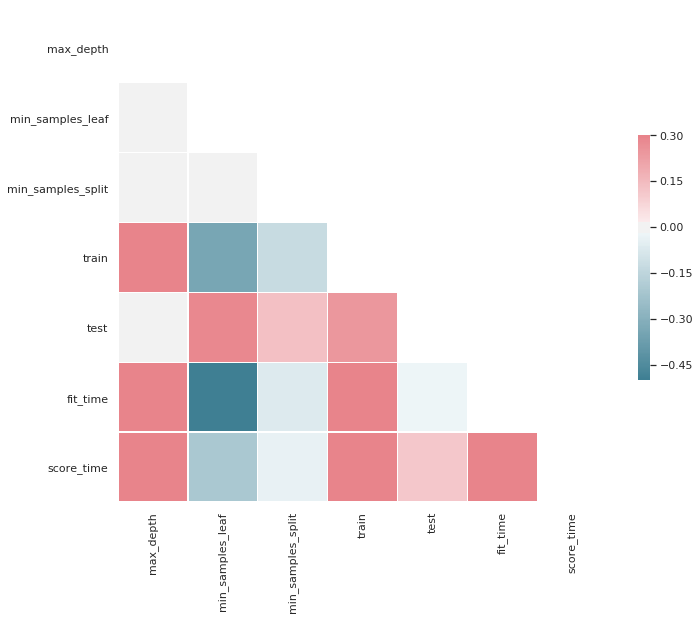

In [34]:
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [35]:
resultados.sort_values("test", ascending=False).head()

max_depth  min_samples_leaf  min_samples_split      train       test  \
63          4               256                256  78.750993  78.672633   
48          4                32                 32  78.750993  78.672633   
34          3                32                128  78.750993  78.672633   
35          3                32                256  78.750993  78.672633   
36          3                64                 32  78.750993  78.672633   

    fit_time  score_time  
63  0.012821    0.001508  
48  0.013382    0.001575  
34  0.011313    0.001450  
35  0.010997    0.001544  
36  0.011083    0.001506

# Explorando espaço de hiper parâmetros com GridSearchCV

In [36]:
from sklearn.model_selection import GridSearchCV

SEED=301
np.random.seed(SEED)

espaco_de_parametros = {
    "max_depth" : [3, 5],
    "min_samples_split" : [32, 64, 128],
    "min_samples_leaf" : [32, 64, 128],
    "criterion" : ["gini", "entropy"]
}

busca = GridSearchCV(DecisionTreeClassifier(),
                    espaco_de_parametros,
                    cv = GroupKFold(n_splits = 10))
busca.fit(x_azar, y_azar, groups = dados.modelo)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0       0.012578         0.001678           0.7868           0.78751   
1       0.012013         0.001550           0.7868           0.78751   
2       0.011865         0.001710           0.7868           0.78751   
3       0.011986         0.001668           0.7868           0.78751   
4       0.011269         0.001491           0.7868           0.78751   

  param_criterion param_max_depth param_min_samples_leaf  \
0            gini               3                     32   
1            gini               3                     32   
2            gini               3                     32   
3            gini               3                     64   
4            gini               3                     64   

  param_min_samples_split                                             params  \
0                      32  {'criterion': 'gini', 'max_depth': 3, 'min_sam...   
1                      64  {'criterion': 'gini', 'max_depth': 3, 'min_sam...   
2                     128  {'criterion': 'gini', 'max_depth': 3, 'min_sam...   
3                      32  {'criterion': 'gini', 'max_depth': 3, 'min_sam...   
4                      64  {'criterion': 'gini', 'max_depth': 3, 'min_sam...   

   rank_test_score       ...         split7_test_score  split7_train_score  \
0                1       ...                  0.781818            0.788124   
1                1       ...                  0.781818            0.788124   
2                1       ...                  0.781818            0.788124   
3                1       ...                  0.781818            0.788124   
4                1       ...                  0.781818            0.788124   

   split8_test_score  split8_train_score  split9_test_score  \
0            0.77551            0.788803           0.790262   
1            0.77551            0.788803           0.790262   
2            0.77551            0.788803           0.790262   
3            0.77551            0.788803           0.790262   
4            0.77551            0.788803           0.790262   

   split9_train_score  std_fit_time  std_score_time  std_test_score  \
0            0.786834      0.001494        0.000176        0.011338   
1            0.786834      0.001082        0.000113        0.011338   
2            0.786834      0.000537        0.000220        0.011338   
3            0.786834      0.000322        0.000211        0.011338   
4            0.786834      0.000762        0.000077        0.011338   

   std_train_score  
0         0.001303  
1         0.001303  
2         0.001303  
3         0.001303  
4         0.001303  

[5 rows x 34 columns]

In [37]:
print(busca.best_params_)
print(busca.best_score_ * 100)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 32, 'min_samples_split': 32}
78.68


In [38]:
melhor = busca.best_estimator_
melhor

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=32, min_samples_split=32,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [39]:
from sklearn.metrics import accuracy_score

# evitar essa abordagem pois estará sendo otimista

predicoes = melhor.predict(x_azar)
accuracy = accuracy_score(predicoes, y_azar) * 100
print("Accuracy para os dados foi %.2f%%" % accuracy)

Accuracy para os dados foi 78.75%


# Como ter uma estimativa sem esse vício nos dados que eu já vi?

No caso de cross validation com busca de hiper parâmetros, fazemos uma nova validação cruzada. Chama-se nested cross validation

In [40]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(busca, x_azar, y_azar, cv = GroupKFold(n_splits=10), groups = dados.modelo)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:542: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: ignored

# Infelizmente como o Pandas não suporta nested validation com group k fold não conseguimos prever o resultado para novos grupos

In [41]:
from sklearn.model_selection import GridSearchCV, KFold

SEED=301
np.random.seed(SEED)

espaco_de_parametros = {
    "max_depth" : [3, 5],
    "min_samples_split" : [32, 64, 128],
    "min_samples_leaf" : [32, 64, 128],
    "criterion" : ["gini", "entropy"]
}

busca = GridSearchCV(DecisionTreeClassifier(),
                    espaco_de_parametros,
                    cv = KFold(n_splits = 5, shuffle=True))
busca.fit(x_azar, y_azar)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0       0.012634         0.001812            0.787          0.787525   
1       0.009998         0.001634            0.787          0.787525   
2       0.009757         0.001571            0.787          0.787525   
3       0.010490         0.001570            0.787          0.787525   
4       0.010799         0.001581            0.787          0.787525   

  param_criterion param_max_depth param_min_samples_leaf  \
0            gini               3                     32   
1            gini               3                     32   
2            gini               3                     32   
3            gini               3                     64   
4            gini               3                     64   

  param_min_samples_split                                             params  \
0                      32  {'criterion': 'gini', 'max_depth': 3, 'min_sam...   
1                      64  {'criterion': 'gini', 'max_depth': 3, 'min_sam...   
2                     128  {'criterion': 'gini', 'max_depth': 3, 'min_sam...   
3                      32  {'criterion': 'gini', 'max_depth': 3, 'min_sam...   
4                      64  {'criterion': 'gini', 'max_depth': 3, 'min_sam...   

   rank_test_score       ...         split2_test_score  split2_train_score  \
0                1       ...                    0.8025            0.783625   
1                1       ...                    0.8025            0.783625   
2                1       ...                    0.8025            0.783625   
3                1       ...                    0.8025            0.783625   
4                1       ...                    0.8025            0.783625   

   split3_test_score  split3_train_score  split4_test_score  \
0              0.793               0.786             0.7795   
1              0.793               0.786             0.7795   
2              0.793               0.786             0.7795   
3              0.793               0.786             0.7795   
4              0.793               0.786             0.7795   

   split4_train_score  std_fit_time  std_score_time  std_test_score  \
0              0.7895      0.003648        0.000266        0.009618   
1              0.7895      0.000276        0.000095        0.009618   
2              0.7895      0.000367        0.000035        0.009618   
3              0.7895      0.000735        0.000108        0.009618   
4              0.7895      0.000762        0.000038        0.009618   

   std_train_score  
0         0.002405  
1         0.002405  
2         0.002405  
3         0.002405  
4         0.002405  

[5 rows x 24 columns]

In [42]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(busca, x_azar, y_azar, cv = KFold(n_splits=5, shuffle=True))
scores

array([0.7895, 0.7825, 0.7905, 0.7715, 0.7995])

In [0]:
def imprime_score(scores):
  media = scores.mean() * 100
  desvio = scores.std() * 100
  print("Accuracy médio %.2f" % media)
  print("Intervalo [%.2f, %.2f]" % (media - 2 * desvio, media + 2 * desvio))

In [44]:
imprime_score(scores)

Accuracy médio 78.67
Intervalo [76.80, 80.54]


In [45]:
melhor = busca.best_estimator_
print(melhor)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=32, min_samples_split=32,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


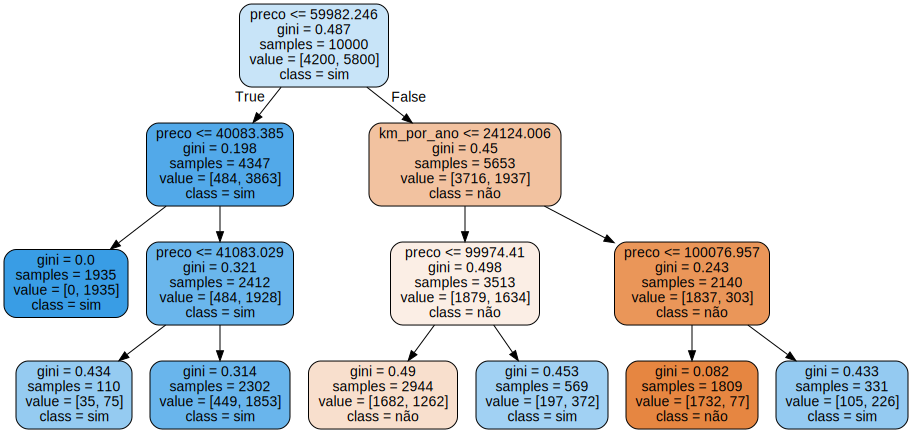

In [46]:
from sklearn.tree import export_graphviz
import graphviz

features = x_azar.columns
dot_data = export_graphviz(melhor, out_file=None, filled=True, rounded=True,
                          class_names=["não","sim"],
                          feature_names = features)
graph = graphviz.Source(dot_data)
graph

# Busca aleatória: RandomSearch

In [47]:
from sklearn.model_selection import RandomizedSearchCV

SEED=301
np.random.seed(SEED)

espaco_de_parametros = {
    "max_depth" : [3, 5],
    "min_samples_split" : [32, 64, 128],
    "min_samples_leaf" : [32, 64, 128],
    "criterion" : ["gini", "entropy"]
}

busca = RandomizedSearchCV(DecisionTreeClassifier(),
                    espaco_de_parametros,
                    n_iter = 16,
                    cv = KFold(n_splits = 5, shuffle=True),
                    random_state = SEED)
busca.fit(x_azar, y_azar)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0       0.013781         0.001871           0.7835          0.788050   
1       0.010896         0.001964           0.7870          0.787525   
2       0.010349         0.001693           0.7870          0.787525   
3       0.021145         0.001767           0.7839          0.788350   
4       0.021081         0.001793           0.7839          0.788350   

  param_criterion param_max_depth param_min_samples_leaf  \
0            gini               5                    128   
1            gini               3                     32   
2            gini               3                    128   
3         entropy               5                     64   
4         entropy               5                     64   

  param_min_samples_split                                             params  \
0                     128  {'min_samples_split': 128, 'min_samples_leaf':...   
1                      64  {'min_samples_split': 64, 'min_samples_leaf': ...   
2                      64  {'min_samples_split': 64, 'min_samples_leaf': ...   
3                      32  {'min_samples_split': 32, 'min_samples_leaf': ...   
4                      64  {'min_samples_split': 64, 'min_samples_leaf': ...   

   rank_test_score       ...         split2_test_score  split2_train_score  \
0               13       ...                    0.7985            0.784750   
1                1       ...                    0.8025            0.783625   
2                1       ...                    0.8025            0.783625   
3                7       ...                    0.8005            0.785250   
4                7       ...                    0.8005            0.785250   

   split3_test_score  split3_train_score  split4_test_score  \
0              0.793               0.786             0.7730   
1              0.793               0.786             0.7795   
2              0.793               0.786             0.7795   
3              0.793               0.786             0.7730   
4              0.793               0.786             0.7730   

   split4_train_score  std_fit_time  std_score_time  std_test_score  \
0            0.790625      0.000988        0.000131        0.011278   
1            0.789500      0.001491        0.000440        0.009618   
2            0.789500      0.000680        0.000092        0.009618   
3            0.791625      0.000233        0.000019        0.011825   
4            0.791625      0.000504        0.000051        0.011825   

   std_train_score  
0         0.002359  
1         0.002405  
2         0.002405  
3         0.002469  
4         0.002469  

[5 rows x 24 columns]

In [48]:
scores = cross_val_score(busca, x_azar, y_azar, cv = KFold(n_splits=5, shuffle=True))
imprime_score(scores)

Accuracy médio 78.71
Intervalo [77.49, 79.93]


In [49]:
melhor = busca.best_estimator_
print(melhor)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=32, min_samples_split=64,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


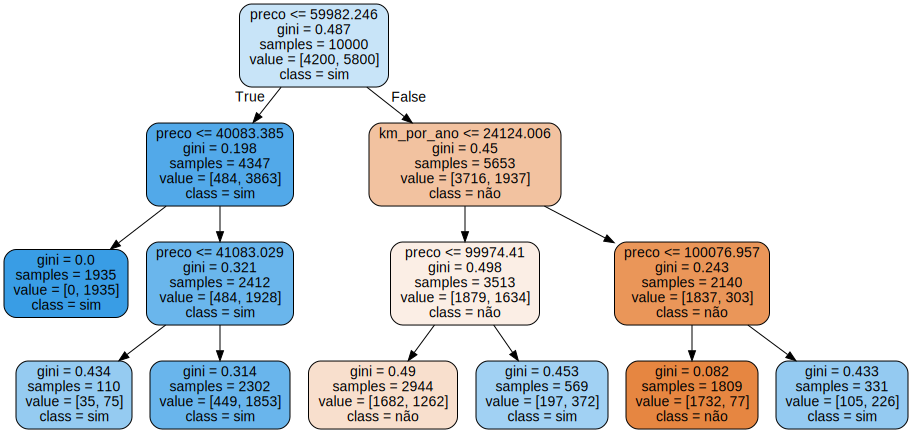

In [50]:
features = x_azar.columns
dot_data = export_graphviz(melhor, out_file=None, filled=True, rounded=True,
                          class_names=["não","sim"],
                          feature_names = features)
graph = graphviz.Source(dot_data)
graph

# Customizando o espaço de hiper parâmetros

In [51]:
from scipy.stats import randint

SEED=301
np.random.seed(SEED)

espaco_de_parametros = {
    "max_depth" : [3, 5, 10, 15, 20, 30, None],
    "min_samples_split" : randint(32, 128),
    "min_samples_leaf" : randint(32, 128),
    "criterion" : ["gini", "entropy"]
}

busca = RandomizedSearchCV(DecisionTreeClassifier(),
                    espaco_de_parametros,
                    n_iter = 16,
                    cv = KFold(n_splits = 5, shuffle=True),
                    random_state = SEED)
busca.fit(x_azar, y_azar)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0       0.015720         0.001768           0.7870          0.787525   
1       0.018495         0.002320           0.7765          0.794500   
2       0.016976         0.001882           0.7793          0.791575   
3       0.021561         0.001794           0.7685          0.802350   
4       0.017163         0.001786           0.7794          0.791400   

  param_criterion param_max_depth param_min_samples_leaf  \
0         entropy               3                     71   
1            gini              15                     93   
2            gini              20                    124   
3            gini            None                     46   
4            gini              15                    126   

  param_min_samples_split                                             params  \
0                     100  {'criterion': 'entropy', 'max_depth': 3, 'min_...   
1                     111  {'criterion': 'gini', 'max_depth': 15, 'min_sa...   
2                      88  {'criterion': 'gini', 'max_depth': 20, 'min_sa...   
3                      62  {'criterion': 'gini', 'max_depth': None, 'min_...   
4                      84  {'criterion': 'gini', 'max_depth': 15, 'min_sa...   

   rank_test_score       ...         split2_test_score  split2_train_score  \
0                1       ...                    0.8025            0.783625   
1               14       ...                    0.7830            0.789375   
2                8       ...                    0.7990            0.787750   
3               16       ...                    0.7725            0.796875   
4                7       ...                    0.7995            0.787500   

   split3_test_score  split3_train_score  split4_test_score  \
0             0.7930            0.786000             0.7795   
1             0.7805            0.792125             0.7725   
2             0.7790            0.789000             0.7735   
3             0.7835            0.800875             0.7560   
4             0.7790            0.788875             0.7745   

   split4_train_score  std_fit_time  std_score_time  std_test_score  \
0            0.789500      0.002053        0.000071        0.009618   
1            0.795375      0.000632        0.000676        0.004393   
2            0.791750      0.000632        0.000163        0.010221   
3            0.803375      0.001433        0.000053        0.010378   
4            0.791625      0.000670        0.000034        0.010413   

   std_train_score  
0         0.002405  
1         0.003345  
2         0.002898  
3         0.003206  
4         0.002898  

[5 rows x 24 columns]

In [52]:
scores = cross_val_score(busca, x_azar, y_azar, cv = KFold(n_splits=5, shuffle=True))
imprime_score(scores)
melhor = busca.best_estimator_
print(melhor)

Accuracy médio 78.71
Intervalo [77.49, 79.93]
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=71, min_samples_split=100,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [65]:
resultados_ordenados_pela_media = resultados.sort_values("mean_test_score", ascending=False)
for indice, linha in resultados_ordenados_pela_media.iterrows():
  print("%.3f +-(%.3f) %s" % (linha.mean_test_score, linha.std_test_score*2, linha.params))
  

0.787 +-(0.019) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 71, 'min_samples_split': 100}
0.784 +-(0.024) {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 73, 'min_samples_split': 72}
0.784 +-(0.024) {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 64, 'min_samples_split': 67}
0.781 +-(0.017) {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 108, 'min_samples_split': 110}
0.780 +-(0.019) {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 125, 'min_samples_split': 59}
0.780 +-(0.012) {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 103, 'min_samples_split': 96}
0.779 +-(0.021) {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 126, 'min_samples_split': 84}
0.779 +-(0.020) {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 124, 'min_samples_split': 88}
0.779 +-(0.009) {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 101, 'min_samples_split': 52}
0.779 +-(0.014) {'criterion': 'entropy', 'max_depth

# Uma exploração mais a fundo de forma aleatória

In [69]:
from scipy.stats import randint

SEED=564
np.random.seed(SEED)

espaco_de_parametros = {
    "max_depth" : [3, 5, 10, 15, 20, 30, None],
    "min_samples_split" : randint(32, 128),
    "min_samples_leaf" : randint(32, 128),
    "criterion" : ["gini", "entropy"]
}

busca = RandomizedSearchCV(DecisionTreeClassifier(),
                    espaco_de_parametros,
                    n_iter = 64,
                    cv = KFold(n_splits = 5, shuffle=True),
                    random_state = SEED)
busca.fit(x_azar, y_azar)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0       0.030208         0.001789           0.7701          0.795350   
1       0.009833         0.001595           0.7869          0.787525   
2       0.017938         0.001735           0.7780          0.793650   
3       0.033726         0.001958           0.7711          0.800650   
4       0.019340         0.001727           0.7760          0.797025   

  param_criterion param_max_depth param_min_samples_leaf  \
0         entropy            None                     84   
1            gini               3                     53   
2            gini              30                    118   
3         entropy            None                     53   
4            gini              10                     44   

  param_min_samples_split                                             params  \
0                     103  {'criterion': 'entropy', 'max_depth': None, 'm...   
1                      60  {'criterion': 'gini', 'max_depth': 3, 'min_sam...   
2                      61  {'criterion': 'gini', 'max_depth': 30, 'min_sa...   
3                      85  {'criterion': 'entropy', 'max_depth': None, 'm...   
4                      67  {'criterion': 'gini', 'max_depth': 10, 'min_sa...   

   rank_test_score       ...         split2_test_score  split2_train_score  \
0               62       ...                    0.7735            0.797000   
1                1       ...                    0.7915            0.786500   
2               18       ...                    0.7785            0.795750   
3               57       ...                    0.7760            0.801125   
4               29       ...                    0.7835            0.795375   

   split3_test_score  split3_train_score  split4_test_score  \
0             0.7620            0.794125             0.7625   
1             0.7905            0.786750             0.7765   
2             0.7720            0.791125             0.7875   
3             0.7650            0.800250             0.7655   
4             0.7695            0.796625             0.7735   

   split4_train_score  std_fit_time  std_score_time  std_test_score  \
0            0.794625      0.002527        0.000048        0.006583   
1            0.790125      0.000339        0.000031        0.005607   
2            0.794250      0.001012        0.000023        0.005273   
3            0.802125      0.000958        0.000271        0.005295   
4            0.796875      0.000331        0.000031        0.004669   

   std_train_score  
0         0.001029  
1         0.001379  
2         0.001536  
3         0.000923  
4         0.001105  

[5 rows x 24 columns]

In [70]:
resultados_ordenados_pela_media = resultados.sort_values("mean_test_score", ascending=False)
for indice, linha in resultados_ordenados_pela_media.iterrows():
  print("%.3f +-(%.3f) %s" % (linha.mean_test_score, linha.std_test_score*2, linha.params))
  

0.787 +-(0.011) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 33, 'min_samples_split': 77}
0.787 +-(0.011) {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 38, 'min_samples_split': 113}
0.787 +-(0.011) {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 53, 'min_samples_split': 60}
0.787 +-(0.011) {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 61, 'min_samples_split': 86}
0.787 +-(0.011) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 49, 'min_samples_split': 58}
0.787 +-(0.011) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 58, 'min_samples_split': 118}
0.787 +-(0.011) {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 122, 'min_samples_split': 117}
0.786 +-(0.013) {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 39, 'min_samples_split': 73}
0.786 +-(0.013) {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 45, 'min_samples_split': 65}
0.786 +-(0.014) {'criterion': 'entropy', 'max_depth': 5, 

In [71]:
scores = cross_val_score(busca, x_azar, y_azar, cv = KFold(n_splits=5, shuffle=True))
imprime_score(scores)
melhor = busca.best_estimator_
print(melhor)

Accuracy médio 78.69
Intervalo [77.64, 79.74]
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=53, min_samples_split=60,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
